## PDC Project

In [1]:
import client
import channel_helper
import transmitter
import reciever

import matplotlib.pyplot as plt
import numpy as np

### Transmitter

In [2]:
transmitter.run()

Codeword: 
 11111111 


### Channel Effect

In [3]:
!python client.py --input_file=passband.txt --output_file=output.txt --srv_hostname=iscsrv72.epfl.ch --srv_port=80

### Reciever

In [4]:
reciever.run()

### Plots

In [5]:
def compute_array(datapath):
    f = open(datapath, 'r')
    array = f.read().split('\n')
    length = len(array)
    plot_array = array[:(length-1)]
    
    
    plot_array = list(map(float, plot_array))
    return plot_array


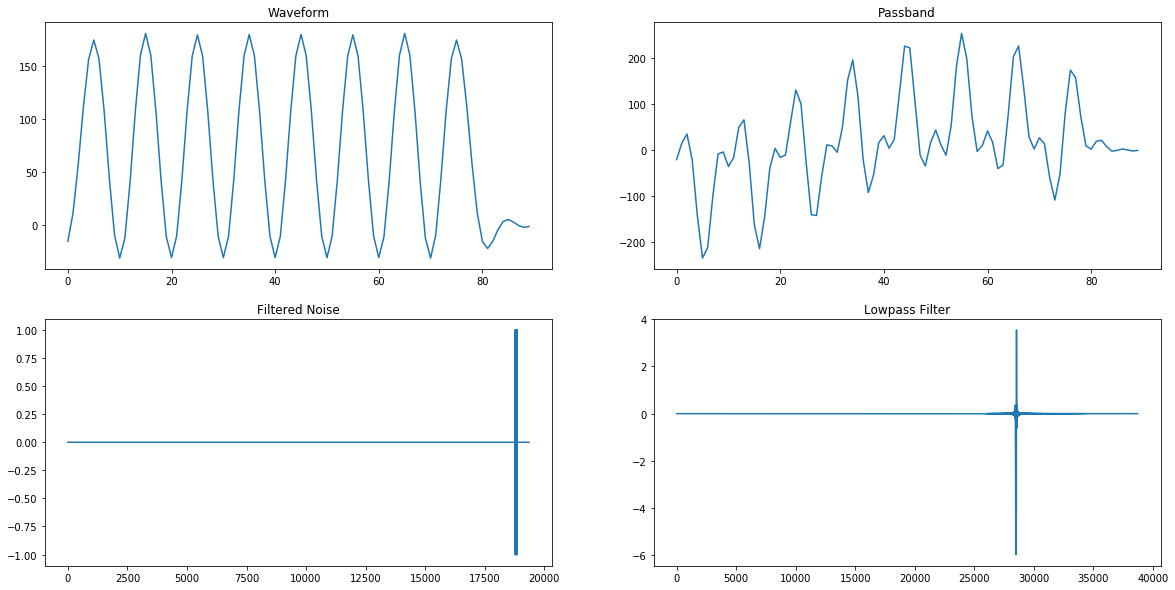

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))

waveform = compute_array("waveform.txt")
passband = compute_array("passband.txt")
filtered_noise = compute_array("filtered_noise.txt")
lowpass = compute_array("lowpass.txt")


ax[0][0].plot(waveform)
ax[0][0].set_title('Waveform')
ax[0][1].plot(passband)
ax[0][1].set_title('Passband')
ax[1][0].plot(filtered_noise)
ax[1][0].set_title('Filtered Noise')
ax[1][1].plot(lowpass)
ax[1][1].set_title('Lowpass Filter')


plt.show()

### Closer look

<function matplotlib.pyplot.show(*args, **kw)>

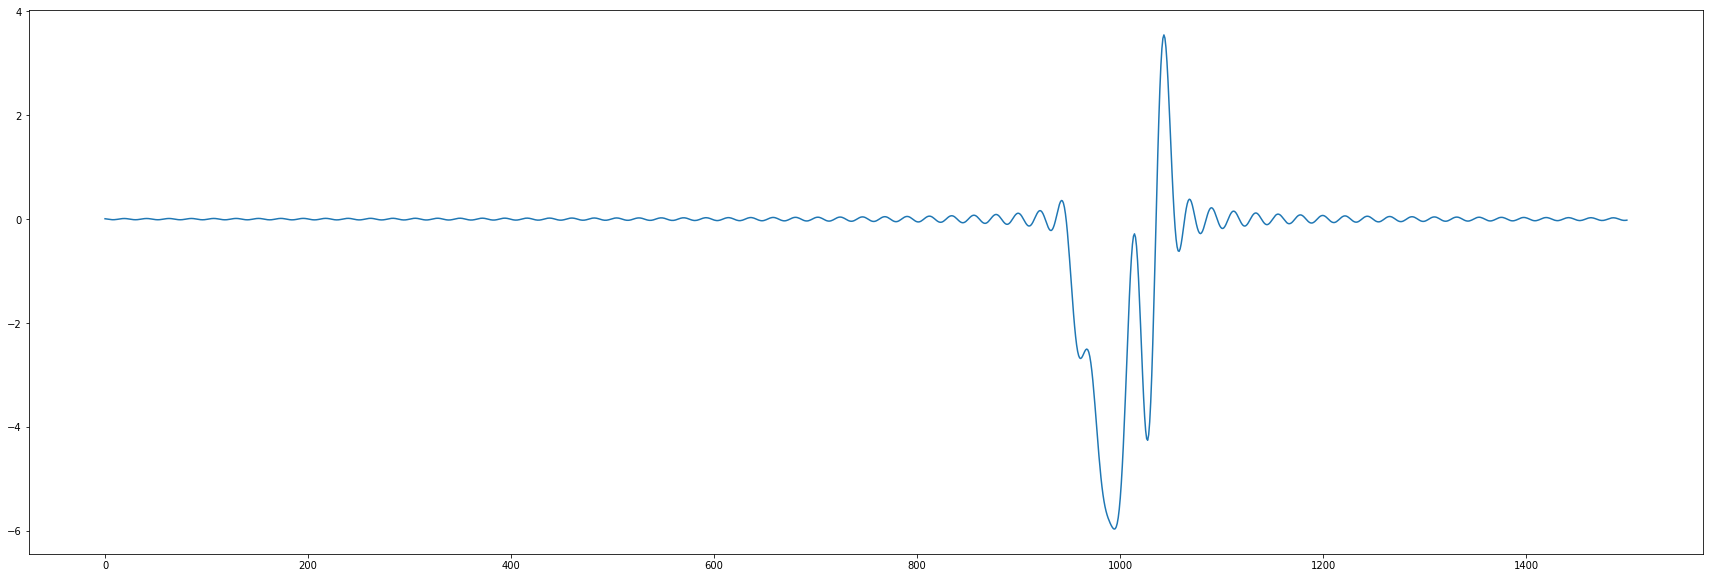

In [9]:
detail_lowpass = lowpass[27500:29000]
plt.figure(figsize=(30,10))
plt.plot(detail_lowpass)
plt.show